In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

import matplotlib.pyplot as plt # some plotting!
import seaborn as sns # so pretty!
from scipy import stats # I might use this
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("all.csv")
data = data.dropna()
data = data.values

train_size = int(len(data)*0.6)

train = data[0:train_size,:]
test= data[train_size:,:]

In [3]:
models = []
models.append(('RF', RandomForestRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor()))

In [4]:
# configure bootstrap
# repeat bootstrap 100 times to learn properties of estimator
n_iterations = 100 
n_size = int(len(train)*0.8)

# run bootstrap
count = 0
stats = {'RF':[],'KNN':[],'DT':[]}
for i in range(n_iterations):
    for name, model in models:
        # prepare train and test sets
        train = resample(train, n_samples=n_size)
        # fit model
        model.fit(train[:,1:-1], train[:,-1])
        # evaluate model
        predictions = model.predict(test[:,1:-1])
        score = mean_absolute_error(test[:,-1], predictions)
        stats[name].append(score)
#     print(i)

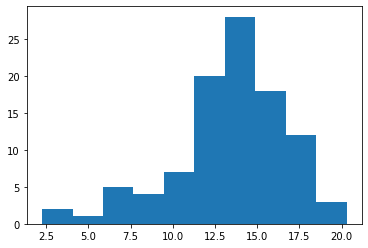

RF regressor has MAPE 13.532158536585364 with standard deviation of 3.4208208364328625


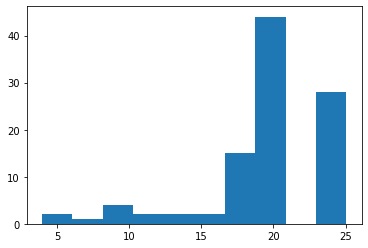

KNN regressor has MAPE 19.38419512195122 with standard deviation of 4.701823746307856


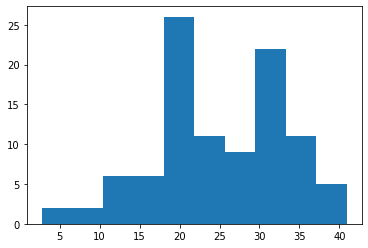

DT regressor has MAPE 24.781243902439027 with standard deviation of 8.089671352601373


In [5]:
for i in stats:
    plt.hist(stats[i])
    plt.show()
    print("{} regressor has MAPE {} with standard deviation of {}".format(i,np.mean(stats[i]), np.std(stats[i])))

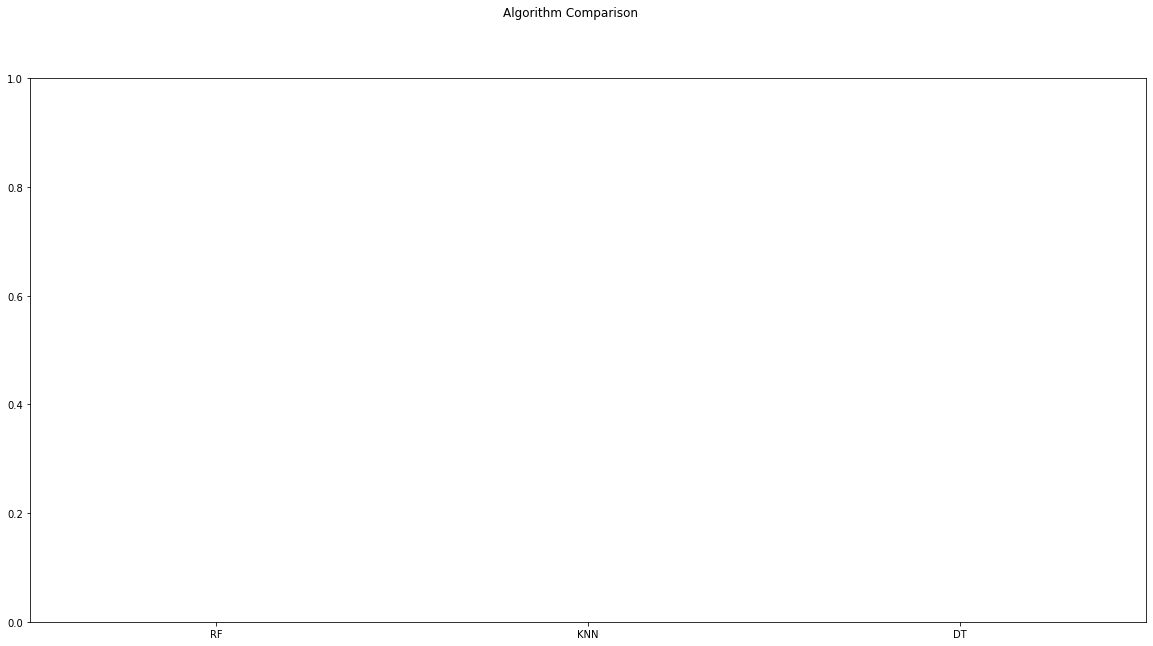

In [6]:
names = []
results = []

for i in stats:
    names.append(i)
    results.append(stats[i])
    
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylim([0,1.0])
plt.show()